### About the Project

In the project, we are give a dataset of Iris flowers. It contains some characteristics/features of the flower and which species the flower belongs to. We have to perform Exploratory Data Analysis of each of the features, label encode the flower variety and conduct 2 experiments. 

In first experiment, we need to split the dataset into 60-20-20 ratio meaning 60% of the data will be used to train the model, 20% will be used to validate the models and 20% will be used to get unbiased result of the best performing model which we get from the validate dataset. We need to perform the KFold Cross Validation to find a baseline performace of the models, perform Grid Search to find optimal hyperparameters for the model which inturn will increase its accuarcy, and finally compare the 3 models which we have selected using classification metrics like Accuracy, Precision, Recall and Latency of the model.

In the second experiment, the change will be only on how we split the dataset. Here, we split the dataset into 80-10-10
ratio. 80% will go to training the model, 10% will go to validate the model and 10% will go to test the model. Other all the steps are same.

Finally, we need to conclude, by explaining which split gave us the best model and explain what might be the reason for that. 

### About the Dataset

The Iris dataset consists of features related to iris flowers species. We have 5 columns in the dataset. They are:

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width
5. Species

The top four columns contains the raw data which might be able to explain which species/class iris flower we are looking at. We have Setosa, Versicolor and Virginica as our classes. The dataset consists of 50 records for each species making the total row count of 150. The dataset is evenly distributed. The setosa class can be linearly separated however, other 2 classes are not linearly separable from each other making the dataset simple but interesting to test our models.  

The dataset is best known to be used frequently in the pattern recognition literature. The orginal paper and usage can be found in the UCI Machine Learning Repository -- Iris Data Set. 

# Exploratory Data Analysis (EDA)

In [2]:
#importing necessary dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset we will be working on
iris = pd.read_excel('iris.xlsx')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This shows us that, we have 150 records and 5 columns. Among, them 4 columns (sepal.length, sepal.width, petal.length, petal.width) are of float type i.e numeric whereas one (variety) is object i.e string.

In [4]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


The describe function give us a quick descriptive analysis of the dataframe. Here, we see that, the highest value in our dataset is 7.9 i.e of sepal length whereas the lowest value is 0.1 of petal.width. Seeing the maximum and minimum values we might be able to say that, there isn't many outliers in our dataset.

In [5]:
iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

We do not have any null or NaN values in our dataset.

In [7]:
iris.duplicated().value_counts()

False    149
True       1
dtype: int64

Here, we have one duplicated value. We can remove it as it will not further add any kind of additional value while training our model. 

In [8]:
#removing the duplicate values form the dataset
iris.drop_duplicates(inplace = True)
iris.shape

(149, 5)

### Outlier Handeling:

<AxesSubplot:ylabel='sepal.width'>

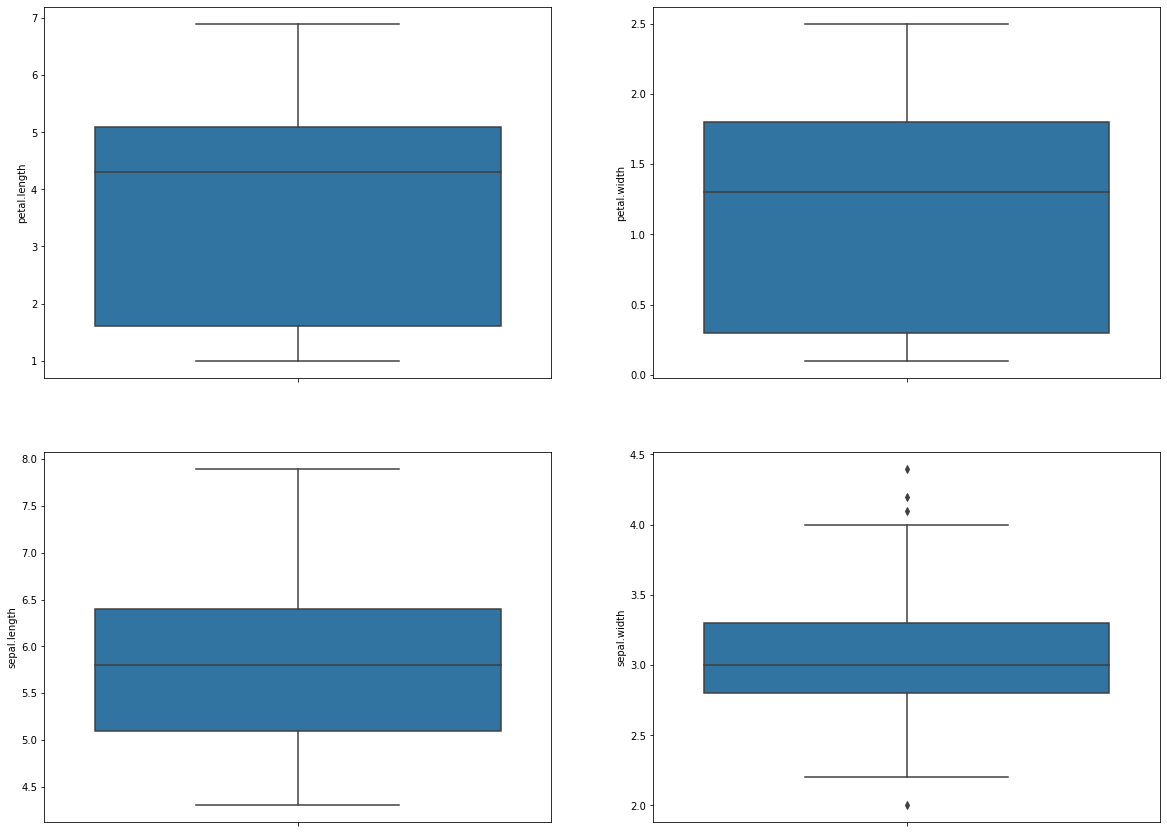

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(y='petal.length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(y='petal.width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(y='sepal.length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(y='sepal.width',data=iris)

Here, we can see no outliers in our dataset except with the sepal.width. From the box plot, we can see that, the outliers present are only 4 and are not far away from the maximum and mimimum values. And, we only have 149 number of records, so we cannot afford to again reduce our dataset as it already has few number of records to train the model with. So, for that reason we are going to ignore the outliers.  

### Checking Distribution of Dataset using Histogram

In [10]:
iris_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

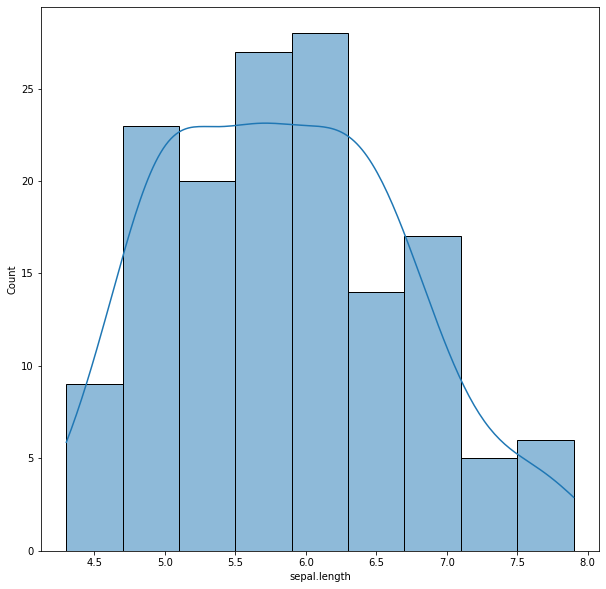

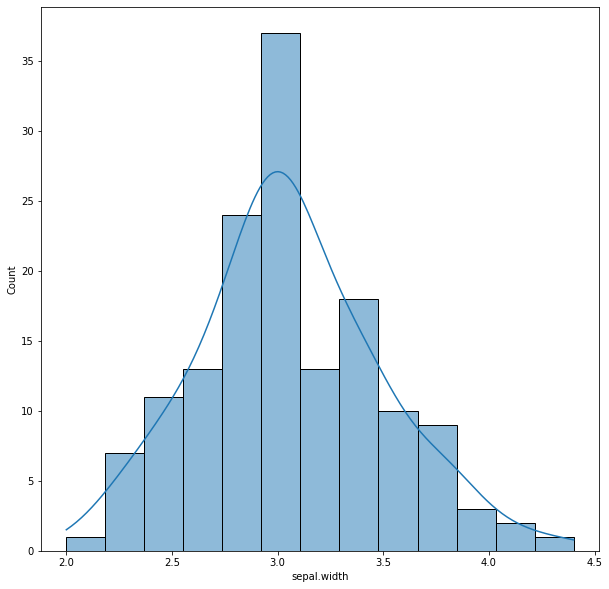

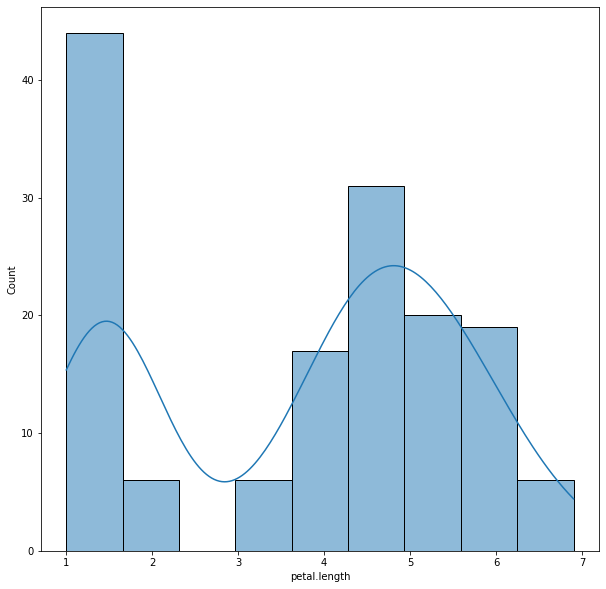

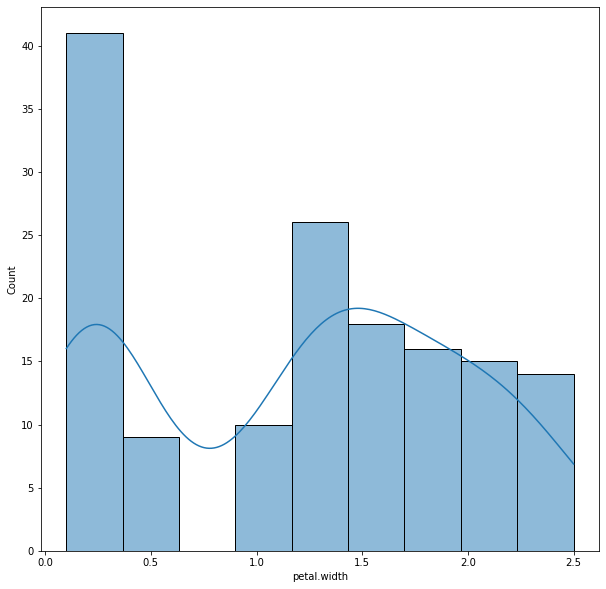

In [11]:
for i in range(len(iris_columns)):
    plt.figure(figsize=(10,10))
    sns.histplot(data=iris, x=iris_columns[i], kde=True)

In [12]:
distribution = iris.agg(['skew','kurtosis']).transpose()
distribution

,skew,kurtosis
sepal.length,0.312826,-0.569006
sepal.width,0.307149,0.226236
petal.length,-0.263101,-1.408270
petal.width,-0.090076,-1.339953


From the graph and the values, we got for skewness and kurtosis, we can conform that, our dataset is normally distributed. We consider a distribution to be normal if the skewness is between -2 to +2 and kurtosis to be between -7 to +7. So, the values are well under that range, meaning they are normal and need no statistical treatment. 

### Taking an overall view of the dataset using pairplot : Multivariate Analysis

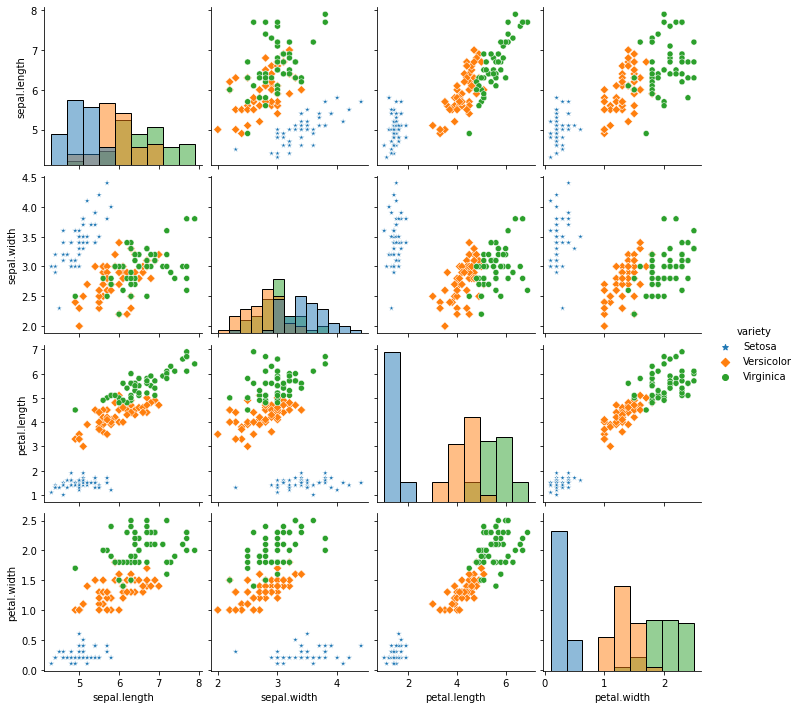

In [13]:
figsize=(30,25)
sns.pairplot(iris, hue='variety', diag_kind='hist', markers=['*',"D","o"])

From the pairplot, we can see that, the variety Setosa can be classified easily taking any of the combination. However, it is not true for other two varities. The best distinction can be give by the petal.length and petal.width chart. This is only for 2 dimension but as the dimension or features increases, the model might have many other ways to accurately differenciate the varities. 

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

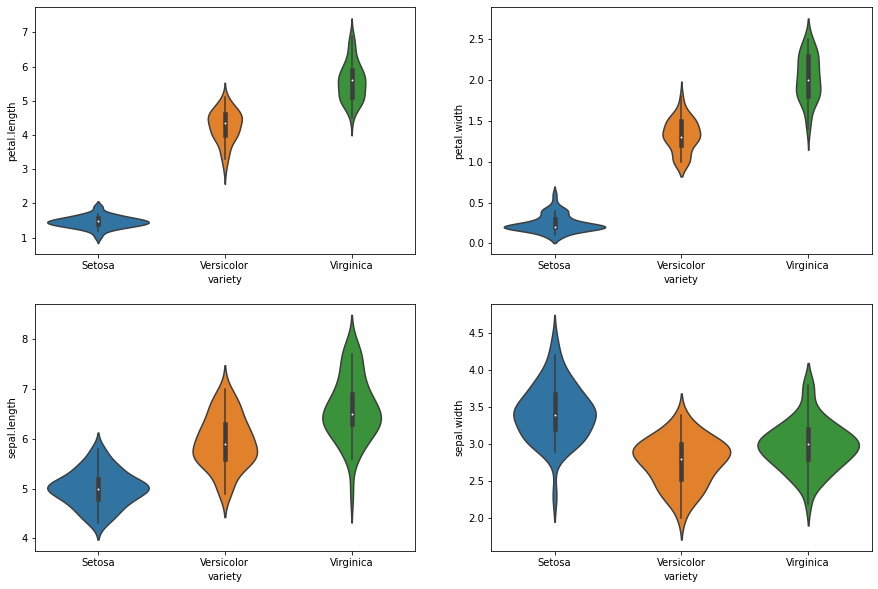

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='petal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='sepal.width',data=iris)

The above violinplot shows us the distribution of every variety in each of the feature category. They are seen to be noramlly distributed. Which will be beneficial to train our model. 

### Nunique

In [15]:
#Now lets see the unique values we have.
iris.nunique()

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

### Exploring the target variable (Variety) further

In [16]:
iris['variety'].unique()

# we have only three classes we need to classify

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [17]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     49
Name: variety, dtype: int64

<AxesSubplot:>

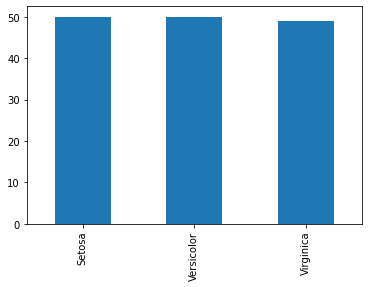

In [18]:
iris['variety'].value_counts().plot(kind='bar')

We see that, they are equally present in our dataset. This will not cause the imbalance problem and will not make a model more biased towards one class. So, we do not have to implement technique like SMOTE for this. 

### Encode the target variables i.e convert variety to numerical types

We know that, the machine learning models, cannot handle the string/object type so we need to convert all the categorical variables or object type variables to float or int.

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


Here, we only have the variety i.e target column to be object. So, we need to change it to numerical. We have only one feature to change and it only have small amount of unique values. For that reason, we can use the map function otherwise if there were a lot of features need to be encoded we could have used LabelEncoding() or OneHotEncoder() from Sklearn library.

In [20]:
varity_num = {'Setosa': 1, 'Versicolor': 2,'Virginica':3}


In [21]:
iris['variety'] = iris['variety'].map(varity_num)

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.1 KB


In [23]:
iris.sample(random_state=111, n=10)

,sepal.length,sepal.width,petal.length,petal.width,variety
111,6.4,2.7,5.3,1.9,3
15,5.7,4.4,1.5,0.4,1
148,6.2,3.4,5.4,2.3,3
53,5.5,2.3,4.0,1.3,2
56,6.3,3.3,4.7,1.6,2
24,4.8,3.4,1.9,0.2,1
46,5.1,3.8,1.6,0.2,1
96,5.7,2.9,4.2,1.3,2
102,7.1,3.0,5.9,2.1,3
26,5.0,3.4,1.6,0.4,1


### Using co-relation matrix to see the relation amoung the featues with the target variable. 

Here, the four columns sepal.length, sepal.width, petal.length, petal.width are the feature columns and the variety is the target column. 

In [24]:
df = iris.corr(method='pearson')
df.style.background_gradient(cmap='RdBu_r')

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal.width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal.length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal.width,0.820620,-0.362894,0.962772,1.000000,0.956514
variety,0.786971,-0.422987,0.949402,0.956514,1.000000


We can see that, the feature variables are highly co-realted with the target variable. Meaning we do not have to remove any columns and keeping them which will allow the models to extract the relation that a simple heatmap cannot show to us.

### Saving the Iris Dataset to be used in both the Experiment:

In [25]:
iris.to_csv('iris_final.csv',index=False)

### Loading the dataset 

In [26]:
iris = pd.read_csv('iris_final.csv')

In [27]:
iris.shape

(149, 5)

In [28]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y= iris['variety']

In [31]:
X.shape

(149, 4)

In [32]:
y.shape

(149,)

### Feature Scaling: 

Feature Scaling helps us to standarize all the features we have into one scale. It is a standard practise to do as it will remove any kind of abnormality in the dataset

In [33]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [34]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: variety, dtype: int64

## Experiment 1: 

### Spliting Dataset into 60-20-20 ratio:

60% --> Training
20% --> Validation
20% --> Testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=111)

In [38]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=111)

In [39]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


Here we are able to successfully split the dataset into train, validation and training dataset into 60, 20, 20 ratio. As, per the first experiment requirement. 

### Model Implementation:

Since it is a classification problem. For the model implementation, we have choosed three classification models: 
1. Random Forest, 
2. Logistic Regression and 
3. Support Vector Machine. 

In [40]:
# importing all the necessary modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Initialization of the Models with random_state and other necessary Parameters

In [41]:
lr = LogisticRegression(random_state=111,max_iter=110)
svc = SVC(random_state=111)
rf = RandomForestClassifier(random_state=111)

### cross_val_score for each of the models:

In [42]:
scores = cross_val_score(estimator=lr,X = X_train, y = y_train, cv=5)

print("The average cross validation score for Logistic Regression: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Logistic Regression:  0.956

 All 5 Cross validation scores: [0.88888889 0.94444444 0.94444444 1.         1.        ]


In [43]:
scores = cross_val_score(estimator=svc,X = X_train, y = y_train, cv=5)

print("The average cross validation score for Support Vector Classifier: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Support Vector Classifier:  0.967

 All 5 Cross validation scores: [0.94444444 0.94444444 0.94444444 1.         1.        ]


In [44]:
scores = cross_val_score(estimator=rf,X = X_train, y = y_train, cv=5)
round(scores.mean(),4)

print("The average cross validation score for Random Forest Classifier: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Random Forest Classifier:  0.933

 All 5 Cross validation scores: [0.88888889 0.83333333 0.94444444 1.         1.        ]


Here, with the initial default parameter, we were able to get the highest score for Support Vector Classifier i.e 0.967. 

We can improve this model along with other using doing hyperparameter tuning. 

### Implementing Grid Search for the Optimization of the Hyperparameters:

Here, we provide a dictionary of different parameters which we can change in our model and try to figure out which combination of parameters will give us the best result/model with best accuracy, precision and recall. 

In [45]:
def print_results(score):

    means = score.cv_results_['mean_test_score']
    sd = score.cv_results_['std_test_score']
    
    print('Score: {} \n BEST PARAMS: {}\n \n'.format(round(score.best_score_,5),score.best_params_))

    
    for mean, std, params in zip(means, sd, score.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 2), round(std * 2, 2), params))


#### For Logistic Regression: 

Here we are only giving the C value. It helps in regularization. Smaller the C value stronger is the regularization. 

In [46]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_model = GridSearchCV(lr, parameters, cv=5)
lr_model.fit(X_train, y_train.values.ravel())

print_results(lr_model)

Score: 0.97778 
 BEST PARAMS: {'C': 10}
 

0.71 (+/-0.04) for {'C': 0.001}
0.73 (+/-0.09) for {'C': 0.01}
0.86 (+/-0.2) for {'C': 0.1}
0.96 (+/-0.08) for {'C': 1}
0.98 (+/-0.05) for {'C': 10}
0.95 (+/-0.09) for {'C': 100}
0.94 (+/-0.1) for {'C': 1000}


With the C parameter being 10. We have improved our score from 0.956 to 0.978.

In [47]:
lr_model_exp1 = lr_model.best_estimator_
lr_model_exp1

LogisticRegression(C=10, max_iter=110, random_state=111)

#### For Support Vector Classifier: 

We will be giving the kernel and the C values. The combination of these will give us better results

In [48]:
parameters = {
    'kernel': ['linear', 'rbf','poly'],
    'C': [0.1, 1, 10,15,20,50],
}

svc_model = GridSearchCV(svc, parameters, cv=5)
svc_model.fit(X_train, y_train.values.ravel())

print_results(svc_model)

Score: 0.97778 
 BEST PARAMS: {'C': 10, 'kernel': 'poly'}
 

0.94 (+/-0.1) for {'C': 0.1, 'kernel': 'linear'}
0.74 (+/-0.15) for {'C': 0.1, 'kernel': 'rbf'}
0.81 (+/-0.19) for {'C': 0.1, 'kernel': 'poly'}
0.96 (+/-0.04) for {'C': 1, 'kernel': 'linear'}
0.97 (+/-0.05) for {'C': 1, 'kernel': 'rbf'}
0.89 (+/-0.16) for {'C': 1, 'kernel': 'poly'}
0.95 (+/-0.09) for {'C': 10, 'kernel': 'linear'}
0.94 (+/-0.1) for {'C': 10, 'kernel': 'rbf'}
0.98 (+/-0.09) for {'C': 10, 'kernel': 'poly'}
0.95 (+/-0.09) for {'C': 15, 'kernel': 'linear'}
0.96 (+/-0.08) for {'C': 15, 'kernel': 'rbf'}
0.98 (+/-0.09) for {'C': 15, 'kernel': 'poly'}
0.94 (+/-0.07) for {'C': 20, 'kernel': 'linear'}
0.96 (+/-0.08) for {'C': 20, 'kernel': 'rbf'}
0.94 (+/-0.1) for {'C': 20, 'kernel': 'poly'}
0.94 (+/-0.1) for {'C': 50, 'kernel': 'linear'}
0.93 (+/-0.09) for {'C': 50, 'kernel': 'rbf'}
0.94 (+/-0.1) for {'C': 50, 'kernel': 'poly'}


Here also we were able to increase our score from 0.967 to 0.978.

In [49]:
svc_model_exp1 = svc_model.best_estimator_
svc_model_exp1

SVC(C=10, kernel='poly', random_state=111)

### For Random Forest:

We have a lot of parameter we can tune for random forest but we are only taking n_estimators, max_depth,max_features, min_sample_split, and min_sample_leaf

In [50]:
parameters = {
    'n_estimators': [2,5, 50, 200],
    'max_depth': [2,4, 8, 16, 32, None],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = GridSearchCV(rf, parameters, cv=5)
rf_model.fit(X_train, y_train.values.ravel())

print_results(rf_model)


Score: 0.97778 
 BEST PARAMS: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
 

0.93 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
0.93 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.94 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.94 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.93 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2}
0.93 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
0.94 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 

In [51]:
rf_model_exp1 = rf_model.best_estimator_
rf_model_exp1

RandomForestClassifier(max_depth=4, n_estimators=5, random_state=111)

Here for the random forest also we were able to increase our score from 0.933 to 0.978. The Max_depth of 4 and n_estimator of 5 we are able to get the score of 0.978 while other parameter take the default values.

Interesting thing to be noted is the model which we got after hyperparameter tuning all have same accuracy. It can imply that, they all were able to correctly predict the result leaving 1 or 2 data. 

There will be more clear distinction amoung the models after we have test them with the validation set in the model performace  phase with unknown data.

### Model Performance

Here for the model performance we are going to take different classification matrix like accuracy, precision score, recall, confusion matrix and to sum them all we are going to create a classification report which will contain all the necessary score we need in one place.

As, we know that, above we have mapped our variety as:

- Setosa: 1
- Versicolor: 2
- Virginica: 3

Here, the most important metrics are :

Accuracy: How accurate is the model able to predict the values. --> (TP + TN)/(TP + TN + FP + FN)

Precision: When the model **predicted** True, how often it was right? --> TP / (TP+FP). eg: when a model said the patient has cancer but in reality it did not have it

Recall: When the class was **actually** True, how often did the classifer get it right.  ---> TP/(TP + FN) eg: when a model said the patiend did not have cancer but in reality they did have it

F1-Score: It is the harmonic mean of both recall and precision. 

In [52]:
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [53]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 4)
    precision = round(precision_score(labels, pred,average='weighted'), 4)
    recall = round(recall_score(labels, pred, average='weighted'), 4)
    confusion_m = confusion_matrix(labels, pred)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                          
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    print('\n')
    print(confusion_m)
    print('\n')
    print(classification_report(labels,pred))

In [54]:
evaluate_model('Logistic Regression', lr_model_exp1, X_val, y_val)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Here, we can see that, the model was able to accurately predict all the three class we had. So, all the matrix are 1 along with that the latency of the model is 1ms. Logistic Regression being a simple model was able to accurately predict all the classes. 

In [55]:
evaluate_model('Support Vector Classifier', svc_model_exp1, X_val, y_val)

Support Vector Classifier -- Accuracy: 0.9667 / Precision: 0.969 / Recall: 0.9667 / Latency: 1.0ms


[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.93      1.00      0.96        13
           3       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



The support vector classifier was not able to accurately predict all the three classes. It was able to correctly predict the class 1 i.e Setosa. 

From the confusion matrix, we can see, one class was predicted incorrectly. The matrix can be interperated as, the true value was Virginica but the model predicted it to be Versicolor.

In [56]:
evaluate_model('Random Forest Classifier', rf_model_exp1, X_val, y_val)

Random Forest Classifier -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Same as logistic regression, Random Forest Classifier was able to accurately classify all the classes. However, the latency of 2.0ms was observed in Random Forest which is 2X the latency of Logistic Regression. 

So, for the final model development and model test we will be using the Logistic Regression Model.

### Testing the Logistic Regression model with the test data. 

In [57]:
evaluate_model('Logistic Regression', lr_model_exp1, X_test, y_test)

Logistic Regression -- Accuracy: 0.9333 / Precision: 0.9436 / Recall: 0.9333 / Latency: 1.0ms


[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.82      0.90        11
           3       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



Here, in the test data set with logistic regression, we can see that, the model was able to accurately predict the class 1 i.e Setosa. But was not able to predict the class 2 i.e Versicolor accurately. The 2 data were inaccurately classified as Virginica but in reality they were versicolor. 

## Experiment 2: 

Here, the only difference in our whole experiment will be the amount of the data we send to training, validation and testing. All the other process will be same. We will be using the same data X and y which we have used above that had been scaled. The models will be same, the model comparision process will be same.

The top 5 rows can be seen below.

In [58]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [59]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: variety, dtype: int64

In [60]:
X.shape

(149, 4)

In [61]:
y.shape

(149,)

### Spliting Dataset into 80-10-10 ratio:

80% --> Training
10% --> Validation
10% --> Testing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=111)

In [63]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.8
0.1
0.1


### Initialization of the Models with random_state and other necessary Parameters

In [64]:
lr = LogisticRegression(random_state=111,max_iter=110)
svc = SVC(random_state=111)
rf = RandomForestClassifier(random_state=111)

### cross_val_score for each of the models:

In [65]:
scores = cross_val_score(estimator= lr,X = X_train, y = y_train, cv=5)

print("The average cross validation score for Logistic Regression: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Logistic Regression:  0.942

 All 5 Cross validation scores: [0.95833333 0.875      0.91666667 0.95833333 1.        ]


In [66]:
scores = cross_val_score(estimator= svc,X = X_train, y = y_train, cv=5)

print("The average cross validation score for Support Vector Classifier: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Support Vector Classifier:  0.958

 All 5 Cross validation scores: [1.         0.91666667 0.91666667 0.95833333 1.        ]


In [67]:
scores = cross_val_score(estimator= rf,X = X_train, y = y_train, cv=5)
round(scores.mean(),4)

print("The average cross validation score for Random Forest Classifier: ",round(scores.mean(),3))
print()
print(" All 5 Cross validation scores:",scores)

The average cross validation score for Random Forest Classifier:  0.933

 All 5 Cross validation scores: [0.95833333 0.91666667 0.91666667 0.875      1.        ]


From the cross validation score we found the the support vector classifier gives us the highest score followed by Logistic Regression and Random Forest Classifier. 

We can increase the score using the grid search by optimizing the hyper-parameters.

### Implementing Grid Search for the Optimization of the Hyperparameters:

In [68]:
def print_results(score):

    means = score.cv_results_['mean_test_score']
    sd = score.cv_results_['std_test_score']
    
    print('Score: {} \n BEST PARAMS: {}\n \n'.format(round(score.best_score_,5),score.best_params_))

    
    for mean, std, params in zip(means, sd, score.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 2), round(std * 2, 2), params))


#### For Logistic Regression: 

In [69]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_model2 = GridSearchCV(lr, parameters, cv=5)
lr_model2.fit(X_train, y_train.values.ravel())

print_results(lr_model2)

Score: 0.96667 
 BEST PARAMS: {'C': 10}
 

0.77 (+/-0.18) for {'C': 0.001}
0.87 (+/-0.06) for {'C': 0.01}
0.91 (+/-0.06) for {'C': 0.1}
0.94 (+/-0.08) for {'C': 1}
0.97 (+/-0.03) for {'C': 10}
0.97 (+/-0.03) for {'C': 100}
0.96 (+/-0.05) for {'C': 1000}


In [70]:
lr_model_exp2 = lr_model2.best_estimator_
lr_model_exp2

LogisticRegression(C=10, max_iter=110, random_state=111)

Here, the accuracy score has increased to 0.9667 from 0.942 by only changing the C value.

#### For Support Vector Classifier: 


In [71]:
parameters = {
    'kernel': ['linear', 'rbf','poly'],
    'C': [0.1, 1, 10,15,20,50],
}

svc_model2 = GridSearchCV(svc, parameters, cv=5)
svc_model2.fit(X_train, y_train.values.ravel())

print_results(svc_model2)

Score: 0.975 
 BEST PARAMS: {'C': 20, 'kernel': 'linear'}
 

0.96 (+/-0.07) for {'C': 0.1, 'kernel': 'linear'}
0.9 (+/-0.07) for {'C': 0.1, 'kernel': 'rbf'}
0.84 (+/-0.11) for {'C': 0.1, 'kernel': 'poly'}
0.96 (+/-0.05) for {'C': 1, 'kernel': 'linear'}
0.96 (+/-0.07) for {'C': 1, 'kernel': 'rbf'}
0.9 (+/-0.08) for {'C': 1, 'kernel': 'poly'}
0.96 (+/-0.0) for {'C': 10, 'kernel': 'linear'}
0.96 (+/-0.05) for {'C': 10, 'kernel': 'rbf'}
0.95 (+/-0.08) for {'C': 10, 'kernel': 'poly'}
0.97 (+/-0.03) for {'C': 15, 'kernel': 'linear'}
0.96 (+/-0.05) for {'C': 15, 'kernel': 'rbf'}
0.97 (+/-0.1) for {'C': 15, 'kernel': 'poly'}
0.98 (+/-0.04) for {'C': 20, 'kernel': 'linear'}
0.96 (+/-0.05) for {'C': 20, 'kernel': 'rbf'}
0.97 (+/-0.1) for {'C': 20, 'kernel': 'poly'}
0.98 (+/-0.04) for {'C': 50, 'kernel': 'linear'}
0.93 (+/-0.08) for {'C': 50, 'kernel': 'rbf'}
0.93 (+/-0.11) for {'C': 50, 'kernel': 'poly'}


In [72]:
svc_model_exp2 = svc_model2.best_estimator_
svc_model_exp2

SVC(C=20, kernel='linear', random_state=111)

As, seen in Logistic Regression, the same can be seen in Support Vector Classifier. The score has increased to 0.975 from 0.958.

### For Random Forest

In [73]:
parameters = {
    'n_estimators': [2,5, 50, 200],
    'max_depth': [2,4, 8, 16, 32, None],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model2 = GridSearchCV(rf, parameters, cv=5)
rf_model2.fit(X_train, y_train.values.ravel())

print_results(rf_model2)



Score: 0.95 
 BEST PARAMS: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
 

0.95 (+/-0.06) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2}
0.94 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.92 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.92 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.95 (+/-0.06) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2}
0.94 (+/-0.08) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
0.92 (+/-0.1) for {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 

In [74]:
rf_model_exp2 = rf_model2.best_estimator_
rf_model_exp2

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=111)

The random forest classifier is the least performing model with a score of 0.95. However, its score has also increase after the hyper parameter optimization. Which means the hyper-parameter tuning had done it job.

From here, we can see that, the SVC model performed best in compared to other after hyper-parameter tuning. Now, we need to evaluate the models performace with the validation data and see which model is best to generalize the unseen validation data. After that, we will be able to select the best model and again get a unbiased view after testing with test dataset. 

### Model Performance


In [75]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 4)
    precision = round(precision_score(labels, pred,average='weighted'), 4)
    recall = round(recall_score(labels, pred, average='weighted'), 4)
    confusion_m = confusion_matrix(labels, pred)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                          
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    print('\n')
    print(confusion_m)
    print('\n')
    print(classification_report(labels,pred))

In [76]:
evaluate_model('Logistic Regression', lr_model_exp2, X_val, y_val)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


[[5 0 0]
 [0 5 0]
 [0 0 5]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [77]:
evaluate_model('Support Vector Classifier', svc_model_exp2, X_val, y_val)

Support Vector Classifier -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


[[5 0 0]
 [0 5 0]
 [0 0 5]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [78]:
evaluate_model('Random Forest', rf_model_exp2, X_val, y_val)

Random Forest -- Accuracy: 0.9333 / Precision: 0.9444 / Recall: 0.9333 / Latency: 2.0ms


[[5 0 0]
 [0 5 0]
 [1 0 4]]


              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



We can see that, the Logistic Regression and SVC model performed the best as they were able to accurately predict the validation dataset without any mistake giving the accuracy, recall and precision of value 1. However, it cannot be said for random forest classifer. It incorrectly predicted 1 data point to be Setosa inplace of Virginica. 

As, we know that, in above training set, SVC was able to accurately generalize the data with the training set giving us the best result. So, we will be choosing the SVC modle for our final deployment and testing with test data to get unbiased overall view of the model.

### SVC model testing with test data:

In [79]:
evaluate_model('Support Vector Classifier', svc_model_exp2, X_test, y_test)

Support Vector Classifier -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


[[5 0 0]
 [0 4 0]
 [0 0 6]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



The svc model was able to accurately classify each and every class of variety. The recall, precision and accuracy was 1. This means the model was accurately able to generalize the unseen data and give a good prediction. There is no overfitting or underfitting of data.

### Comparing the performace of models from two sets of experiments

In [3]:
series = pd.DataFrame(data = [[1,0.9667,1,0.93333,1,1,0.9333,1],[1,0.969,1,0.9436,1,1,0.9444,1],[1,0.967,1,0.9333,1,1,0.9333,1],[1,1.8,2,1,2,2,3,1]],columns=['LR_exp1','SVC_exp1','RF_exp1','Test_LR_exp1','LR_exp2','SVC_exp2','RF_exp2','Test_SVC_exp2'],index=['Accuracy','Precision','Recall','Latency'])
series.T

,Accuracy,Precision,Recall,Latency
LR_exp1,1.00000,1.0000,1.0000,1.0
SVC_exp1,0.96670,0.9690,0.9670,1.8
RF_exp1,1.00000,1.0000,1.0000,2.0
Test_LR_exp1,0.93333,0.9436,0.9333,1.0
LR_exp2,1.00000,1.0000,1.0000,2.0
SVC_exp2,1.00000,1.0000,1.0000,2.0
RF_exp2,0.93330,0.9444,0.9333,3.0
Test_SVC_exp2,1.00000,1.0000,1.0000,1.0


Here, we have accuracy, precision, recall and latency of all the model we tested in this experiment. The suffix tells us which experiment i.e 1 or 2. The prefix tells us about the model implemented to get that result and the "test" in from of some the models meaning that they were selected and test dataset were applied on them.

We can generalize all this by looking at only the Test_LR_exp1 and Test_SVC_exp2. Here, in the exp1 we found that, the LR gave the best result and in exp2 the SVC model gave the best result amoung all the models we created in there respective experiments. So, when the unseen biased data was tested with on LR in the exp1. It was not able to accurately classify every data meaning was not able to generalize the unseen data to the model. However, in the exp2 the SVC model was able to generalize each and every data and getting a accuracy score of 1. 

### Conclusion:

This means that, the model SVC from exp2 is good model than LR from exp1. Making the second experiment choice i.e splitting the dataset into **80-10-10** was good to get overall generalized model. 

The second experiment had a greater number of training dataset which might be the reason it gave us a good model rather than the first experiment which had only 60% of data to train the model. 